In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection & Analysis**

In [170]:
# Loading the data from csv file to a pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [171]:
# Printing first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [172]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [173]:
# To getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
*   Sex
*   Smoker
*   Region






In [174]:
# Checking for missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [175]:
#statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

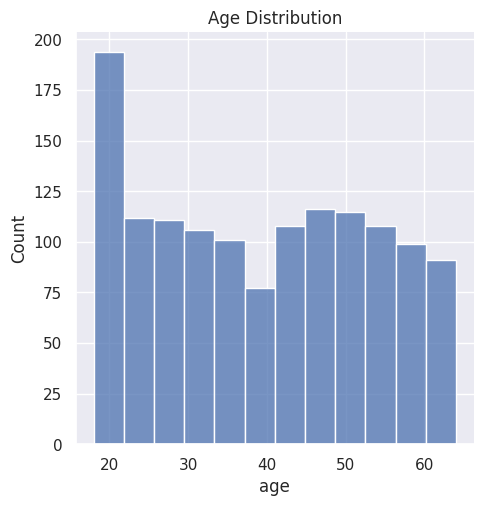

In [176]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

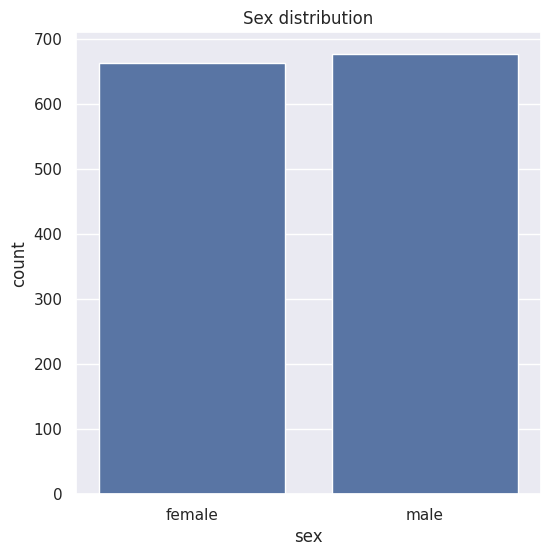

In [177]:
#Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex' , data = insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [178]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

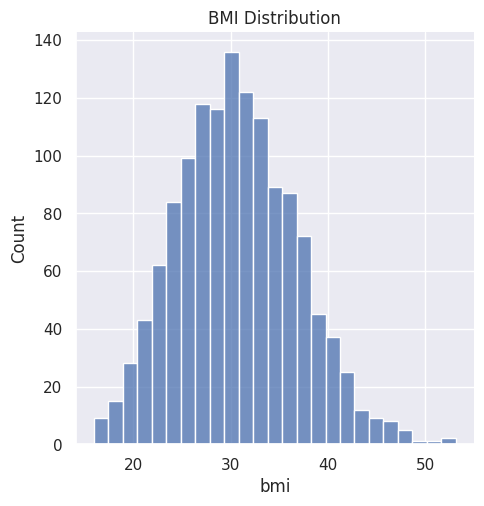

In [179]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range = 18.5 to 24.9

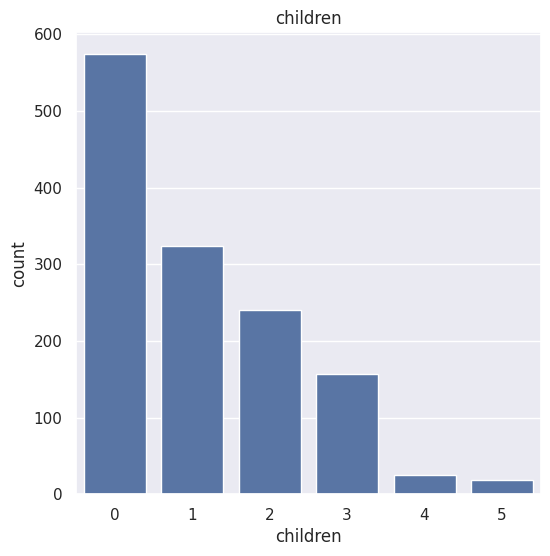

In [180]:
# children column
plt.figure(figsize = (6,6))
sns.countplot(x='children', data= insurance_dataset)
plt.title('children')
plt.show()

In [181]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


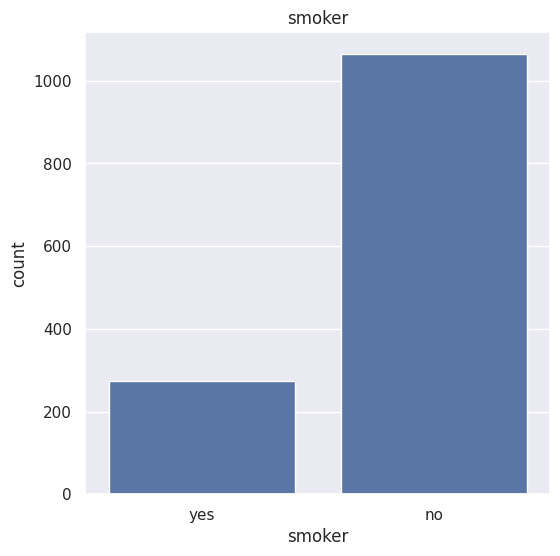

In [182]:
#Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('smoker')
plt.show()

In [183]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


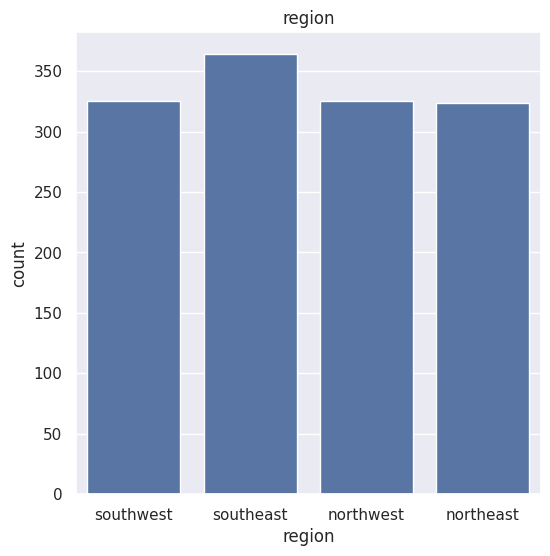

In [184]:
plt.figure(figsize = (6,6))
sns.countplot(x='region', data= insurance_dataset)
plt.title('region')
plt.show()

<Figure size 600x600 with 0 Axes>

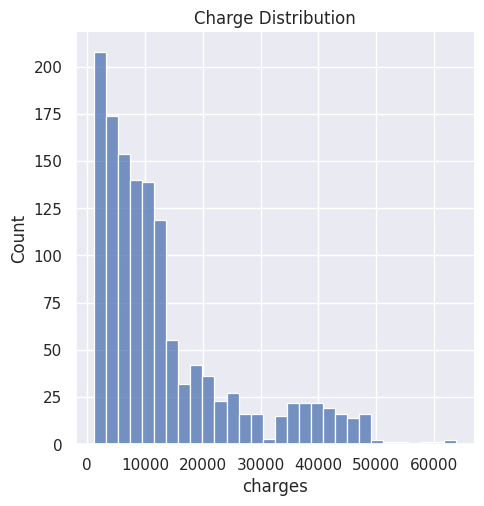

In [185]:
# Charge distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

Data Pre-processing

Encoding the categorical features

In [186]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female' : 1}}, inplace = True)

# encoding 'Smoker' column
insurance_dataset.replace({'smoker' : {'yes': 0, 'no': 1}}, inplace = True)

#encoding 'Region' column
insurance_dataset.replace({'region' :{'southeast':0, 'southwest':1, 'northeast':2, 'northwest' : 3}}, inplace = True)

<ipython-input-186-96f1f465a6dd>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female' : 1}}, inplace = True)
<ipython-input-186-96f1f465a6dd>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker' : {'yes': 0, 'no': 1}}, inplace = True)
<ipython-input-186-96f1f465a6dd>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

Splitting the features and Target

In [187]:
x = insurance_dataset.drop(columns='charges', axis = 1)
y = insurance_dataset['charges']

In [188]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [189]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing data

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)

In [191]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

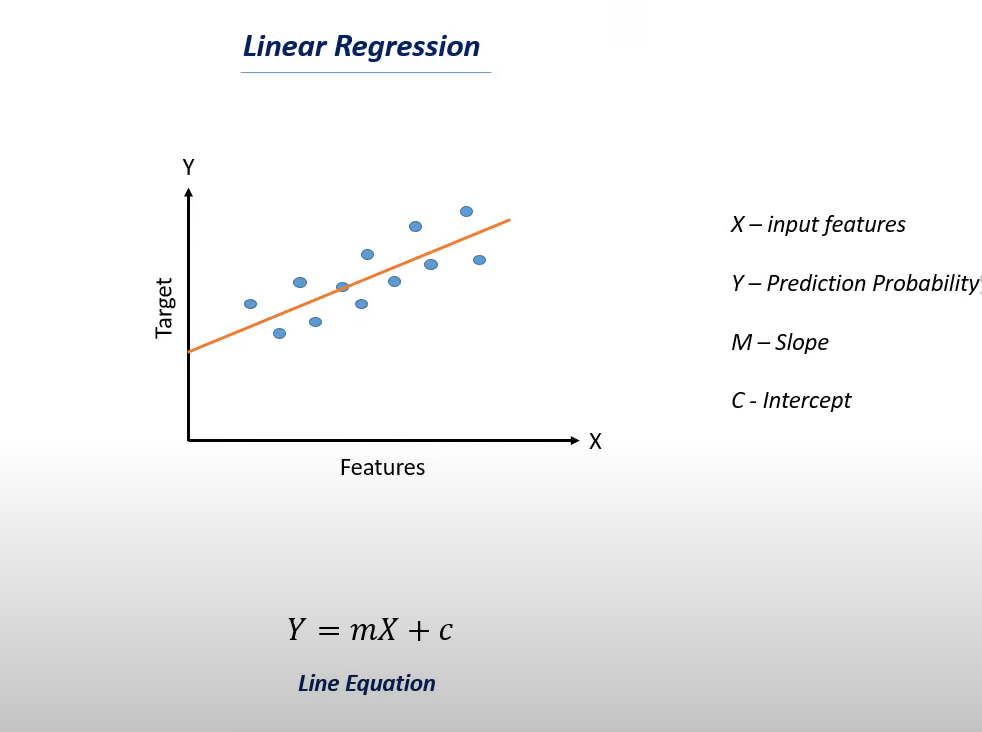

In [192]:
# Loading the Linear Regression model
regressor = LinearRegression()

In [193]:
regressor.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [194]:
# Prediction on training data
training_data_prediction = regressor.predict(x_train)

In [195]:
# R squared value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [196]:
#prediction on test data
test_data_prediction = regressor.predict(x_test)

In [197]:
#R squared value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684076


Building a predictive model

In [199]:
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

input_data = (31, 1, 25.74, 0, 1, 0)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)
prediction = regressor.predict(input_data_df)
print('The insurance cost is USD', prediction[0])

The insurance cost is USD 3760.080576496057
